# Factory-warehouse material flow planning using Genetic Algorithm : Himanshu Bhardwaj

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.utils import shuffle
from tqdm import tqdm

In [1]:
c=[[10,30,15,25,10],[20,25,15,10,20],[12,18,20,15,15]] # Cost of transport from factory i to warehouse j
capf=[1000,2000,1000] # Max capacity of the factory
capw=[450,650,800,1200,950] # max capacity of warehouse
demand=[400,600,700,1000,900] #demand at each warehouse

In [147]:
bitsize = len(capf)*len(capw)
pop_size =1000
cross_rate = 0.9
mut_rate = 1/1000
iterations = 2000
invent=10

In [148]:
def GA_function(fitness, iterations, pop_size, cross_rate, mut_rate):
    #initial population
    init_pop = [np.random.randint(400,1500,bitsize).tolist() for _ in range(pop_size)]   
    best = 0
    best_fitvalue = fitness(init_pop[best])
    for gen in tqdm(range(iterations)):
        fitscore = [fitness(c) for c in init_pop]
        for i in range(pop_size):
            if fitness(init_pop[i]) < best_fitvalue:
                best, best_fitvalue = init_pop[i], fitness(init_pop[i])
                #print(">%d, new best fit f(%s) = %.3f"%(gen, best, best_fitvalue))
        selected = [selection(init_pop, fitscore) for _ in range(pop_size)]
        # create offsprings
        offspring = list()
        for i in range(0, pop_size, 2):
            p1,p2 = selected[i], selected[i+1]
            for c in crossover(p1,p2,cross_rate):
                cc = mutation(c, mut_rate)
                offspring.append(cc)
        init_pop = offspring
        error.append(best_fitvalue)
    return [best, best_fitvalue]

In [149]:
def crossover(parent1, parent2, cross_rate):
    c1 = parent1
    c2 = parent2
    if np.random.rand() < cross_rate:
        pos = np.random.randint(1,len(parent1)-2)
        c1 = parent1[:pos] + parent2[pos:]
        c2 = parent2[:pos] + parent1[pos:]
    return [c1,c2]

In [150]:
def mutation(genes, mut_rate):
    for i in range(len(genes)):
        if np.random.rand()<mut_rate:
            genes[i] = random.randint(0,1500)
    return genes

In [151]:

def fitness(genes):
    aa=np.array(genes).reshape(len(capf),len(capw))
    obj=np.sum(aa*(np.array(c)))
    ff = np.sum(aa,axis=1)
    ww=np.sum(aa,axis=0)
    def fac_cons():
        over=0
        for i in range(len(capf)):
            if ff[i]>=capf[i]:
                over+=1
        return over
    def war_cons():
        over=0
        for i in range(len(capw)):
            if ww[i]>=capw[i]:
                over+=1
        return over
    def demand1():
        over=0
        inventory=0
        for i in range(len(capw)):
            if ww[i]<demand[i]:
                over+=1
            inventory+=invent*(ww[i]-demand[i])
        return [over,inventory]
    #fc = np.sum(np.multiply(fc_cost,f_c))
    #fd = np.sum(np.multiply(fd_cost,f_d))
    #dc = np.sum(np.multiply(dc_cost,d_c))
    pen = 500000
    ddd=demand1()
    total_cost = obj+pen*(fac_cons()+war_cons()+ddd[0])+ddd[1] 
    #print(fc+fd+dc)
    return total_cost

In [152]:
def selection(population, fitscore):
    index = np.random.randint(len(population))
    for ix in np.random.randint(0,len(population),1):
        if fitscore[ix] < fitscore[index]:
            index = ix
    return population[index]

In [153]:
cc=np.array([[1,2,1,2,1],[2,2,1,1,2],[1,1,2,1,1]])
uu=cc*np.array(c)

In [154]:
np.sum(cc,axis=1)

array([7, 8, 6])

In [155]:
np.sum(cc,axis=0)

array([4, 5, 4, 4, 4])

In [156]:
error=[]
best,best_vl=GA_function(fitness, iterations, pop_size, cross_rate, mut_rate)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [13:35<00:00,  2.45it/s]


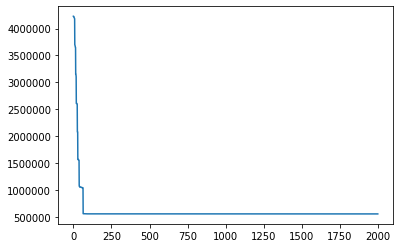

In [157]:
plt.plot(error)

In [158]:
t=np.array(best).reshape(len(capf),len(capw))

In [163]:
for i in range(len(capf)):
    for j in range(len(capw)):
        print("factory: %d will supply %d units of product to warehouse: %d"%(i,t[i][j],j))
        print("------------------------------------------------------------")

factory: 0 will supply 13 units of product to warehouse: 0
------------------------------------------------------------
factory: 0 will supply 94 units of product to warehouse: 1
------------------------------------------------------------
factory: 0 will supply 79 units of product to warehouse: 2
------------------------------------------------------------
factory: 0 will supply 392 units of product to warehouse: 3
------------------------------------------------------------
factory: 0 will supply 63 units of product to warehouse: 4
------------------------------------------------------------
factory: 1 will supply 22 units of product to warehouse: 0
------------------------------------------------------------
factory: 1 will supply 93 units of product to warehouse: 1
------------------------------------------------------------
factory: 1 will supply 204 units of product to warehouse: 2
------------------------------------------------------------
factory: 1 will supply 402 units of pr

In [166]:
for i in range(len(capf)):
    a=np.sum(t,axis=1)
    print("factory: %d will produce %d units of product"%(i,a[i]))
    print("---------------------------------------------")

factory: 0 will produce 641 units of product
---------------------------------------------
factory: 1 will produce 1122 units of product
---------------------------------------------
factory: 2 will produce 1837 units of product
---------------------------------------------


In [168]:
for i in range(len(capw)):
    a=np.sum(t,axis=0)
    print("ware house: %d will receive %d units of product"%(i,a[i]))
    print("------------------------------------------------")

ware house: 0 will receive 400 units of product
------------------------------------------------
ware house: 1 will receive 600 units of product
------------------------------------------------
ware house: 2 will receive 700 units of product
------------------------------------------------
ware house: 3 will receive 1000 units of product
------------------------------------------------
ware house: 4 will receive 900 units of product
------------------------------------------------
